In [203]:
#Load the important libraries

import numpy as np
import pandas as pd
import re
import nltk
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
pd.set_option("display.max_colwidth", 200)
#warnings.filterwarnings("ignore", category = "DeprecationWarning")

%matplotlib inline

In [205]:
#Load the datasets
train = pd.read_csv("train_E6oV3lV.csv")
test = pd.read_csv("test_tweets_anuFYb8.csv")

In [206]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [207]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


**Things to note**
 - **label** is the column that contains the target variable or the value that has to be predicted. 1 means it's a hate speech and 0 means it is not.
 - **tweet** is the column that contains the text of the tweet. This is the main data on which NLP techniques will be applied.
 
Let's have a close look at some of the tweets.

## Data Inspection

In [208]:
#Let's check out a few non-racist/sexist tweets
train[train['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [209]:
#Let's check out a few racist/sexist tweets
train[train['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


There are quite many words and characters which are not really required. So we will try to keep only those words which are impoprtant and add values. 

In [210]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [211]:
train.shape

(31962, 3)

In [212]:
test.shape

(17197, 2)

In [213]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2,242(7%) tweets labelled as racist, and 29,720(93%) tweets labelled as non-racist. So, it is an imbalanced classification challenge.

Now we will check the distribution of the length of the tweets, in terms of words, in both train and test data.

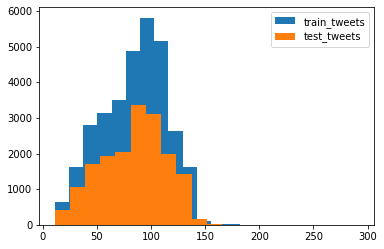

In [214]:
length_train = train['tweet'].str.len()
length_test = test["tweet"].str.len()
plt.hist(length_train, bins = 20, label = "train_tweets")
plt.hist(length_test, bins = 20, label = "test_tweets")
plt.legend()
plt.show()

## Data Cleaning

In [215]:
combine = train.append(test, ignore_index= True)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [216]:
combine.shape

(49159, 3)

In [217]:
#remove unwanted text patterns from the tweets.
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,' ',input_txt)
    return input_txt

### 1. Removing twitter handles (@user)

In [218]:
combine["tidy_tweet"]=np.vectorize(remove_pattern)(combine['tweet'],'@[\w]*')  

In [219]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### 2. Removing Punctuations, Numbers and Special Characters

In [220]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [221]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


### 3. Removing Short Words

In [222]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [223]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## Text Normalization

In [224]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x: x.split())


In [225]:
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

Now we can Normalize the tokenized tweets

In [226]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #stemming

In [227]:
tokenized_tweet

0                                                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1                                    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                                                              [bihday, your, majesti]
3                                                                                     [#model, love, take, with, time]
4                                                                                         [factsguid, societi, #motiv]
                                                             ...                                                      
49154                   [thought, factori, left, right, polaris, #trump, #uselect, #leadership, #polit, #brexit, #blm]
49155                            [feel, like, mermaid, #hairflip, #neverreadi, #formal, #wed, #gown, #dress, #mermaid]
49156    [#hillari, #campaign, today, #ohio, use

In [228]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combine['tidy_tweet'] = tokenized_tweet

In [229]:
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talk befor they leav chao disput when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cav #champion #cleveland #clevelandcavali
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcom here


# Story Generation and visualization from tweets

**(A) Understanding the common words used in the tweets : Wordcloud**

In [230]:
#Let's visualize all the words our data using the wordcloud plot

all_words = ''.join([text for text in combine["tidy_tweet"]]) 
from wordcloud import WordCloud

In [231]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

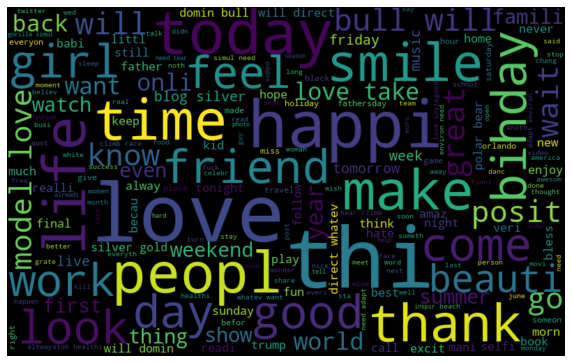

In [232]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

**(B) Common words in non-racist/sexist tweets**

In [233]:
normal_words = ''.join([text for text in combine["tidy_tweet"][combine['label']==0]])

In [234]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(normal_words)

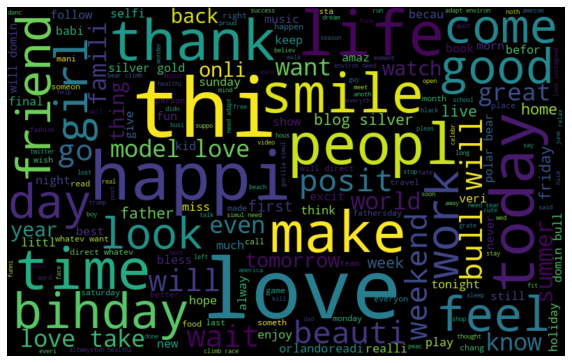

In [235]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

**(C) Common words in Racist tweets**

In [236]:
negative_words = ''.join([text for text in combine["tidy_tweet"][combine['label'] == 1]])

In [237]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(negative_words)

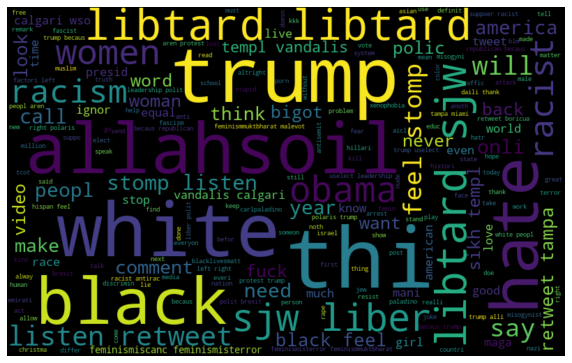

In [238]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on

**D) Understanding the impact of Hashtags on tweets sentiment**

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments. We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [239]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

In [240]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combine['tidy_tweet'][combine['label'] == 1])

In [241]:
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

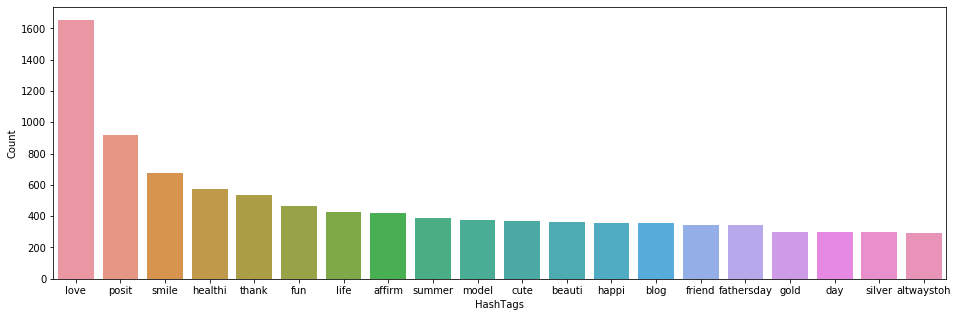

In [242]:
#Non-Racist/Sexist Tweets
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({'HashTags': list(a.keys()), 'Count' : list(a.values())})
# selecting top 20 most frequent hashtags 
d=d.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d , x='HashTags' ,y='Count')
ax.set(ylabel='Count')
plt.show()

All these hashtags are positive and it makes sense.

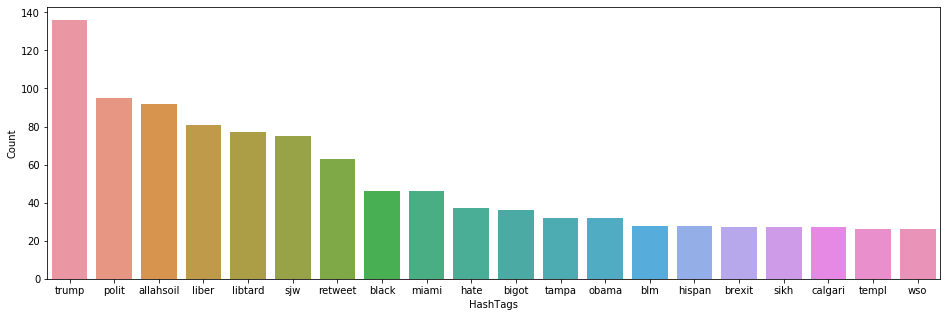

In [243]:
#Racist/Sexist Tweets
b=nltk.FreqDist(HT_negative)
e=pd.DataFrame({'HashTags': list(b.keys()),'Count': list(b.values())})
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x="HashTags",y="Count")
ax.set(ylabel='Count')
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

# Bag-of-Words Features

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.

In [244]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet'])

In [245]:
bow.shape

(49159, 1000)

# TF-IDF Features

In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df = 2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])

In [247]:
tfidf.shape

(49159, 1000)

# Word2Vec Features

### 1. Word Embeddings

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high-dimensional word features into low dimensional feature vectors by preserving the similarity in the corpus.

In [248]:
#Let's train Word2Vec model on our corpus.
import gensim
tokenized_tweet = []
for i in range (len(combine)):
    tokenized_tweet.append([w for w in combine['tidy_tweet'][i].split()])
model_w2v = gensim.models.Word2Vec(tokenized_tweet, 
                                  size = 200, #desired no. of features/ independent variables
                                  window = 5, #context window size
                                  min_count = 5,
                                  sg = 1, #for skip-gram model
                                  hs = 0,
                                  negative = 10, #no. of negative sampling
                                  workers = 4, #no. of cores
                                  seed = 34)
model_w2v.train(tokenized_tweet, total_examples = len(combine['tidy_tweet']), epochs=20)

(5945793, 7536020)

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar wordsfrom the corpus.

In [249]:
model_w2v.wv.most_similar(positive = "dinner")

[('#avocado', 0.5333982706069946),
 ('#pasta', 0.5267280340194702),
 ('burrito', 0.5225406289100647),
 ('#steak', 0.5162591934204102),
 ('#toast', 0.511855959892273),
 ('lamb', 0.5082806348800659),
 ('#saturd', 0.5067107081413269),
 ('dess', 0.5050694942474365),
 ('#rugbi', 0.5002273321151733),
 ('#yum', 0.49984046816825867)]

In [250]:
model_w2v.wv.most_similar(positive = "love")

[('papa', 0.45481061935424805),
 ('hutch', 0.44457900524139404),
 ('#melanin', 0.43863481283187866),
 ('unicorn', 0.43320831656455994),
 ('#fatherday', 0.43208062648773193),
 ('sweethea', 0.4296383857727051),
 ('#newhair', 0.4253116846084595),
 ('darl', 0.4241565465927124),
 ('brisban', 0.4239121079444885),
 ('sob', 0.42022889852523804)]

In [251]:
model_w2v.wv.most_similar(positive = "trump")

[('donald', 0.5359100699424744),
 ('nomine', 0.4874579906463623),
 ('unfit', 0.48622938990592957),
 ('hillari', 0.48570066690444946),
 ('#deplor', 0.4848176836967468),
 ('suppress', 0.46721917390823364),
 ('potu', 0.4656315743923187),
 ('presidenti', 0.46398189663887024),
 ('berni', 0.45745328068733215),
 ('clinton', 0.4563560485839844)]

In [252]:
#Let's check the vector representation of any word from our corpus.
model_w2v['food']

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-0.22596714, -0.25617152, -0.17485492, -0.11052202, -0.1663701 ,
       -0.63617015,  0.06166517, -0.38444507, -0.0886775 , -0.20082895,
       -0.21999191,  0.5043194 ,  0.16723189, -0.13296054, -0.19996397,
        0.41384467,  0.38124952,  0.15969594,  0.523539  ,  0.07743812,
        0.20850472, -0.6559687 , -0.7356322 , -0.01360924, -0.20245256,
       -0.05260003, -0.543667  , -0.11443377,  0.19104095, -0.36237326,
       -0.49176234,  0.26376638,  0.04610569, -0.14199863, -0.17759691,
        0.16357347,  0.03442011,  0.6987003 ,  0.14007315, -0.30969214,
       -0.7531866 , -0.2753396 ,  0.05069063, -0.18266338, -0.24298884,
        0.08297727, -0.9152417 , -0.57165223, -0.16568373,  0.01362322,
       -0.02194941,  0.06844168, -0.12486341, -0.44778565,  0.17351457,
       -0.07964317, -0.6456961 , -0.5699837 ,  0.37969452,  0.12309257,
       -0.52402925, -0.10599989,  0.16148686,  0.11323196, -1.3039256 ,
       -0.29349658,  0.02874054, -0.08918186,  0.3229688 , -0.03

In [253]:
len(model_w2v['food'])

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

### Preparing vectors for tweets

We can simply take mean of all the word vectors present in the tweet. The length of the resultant vectors will e the same, i.e.200. We will repeat the same process for all the tweets in our data and obtain our vectors. Now we have 200 word2vec features for our data.

In [254]:

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [255]:
#Preparing word2vec feature set…
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape    
#Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49159, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

### 2. Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors foe sentence/paragraphs/documents.This approach is ana extension of word2vec.

In [256]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


To implement doc2vec, we have to labelise or tag each tokenized tweet with unique IDs. We can do so by using Genism's LabeledSentence() function.

In [257]:
#To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. 
#We can do so by using Gensim’s LabeledSentence() function.
tokenized_tweet = combine['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  


In [258]:
#Let's have a look at the result.
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [57]:
[LabeledSentence(words=['when', 'a','father', 'is','dysfunct', 'and', 'is', 'so','selfish', 'he','drag', 'hi','kid', 'into','hi', 'dysfunct', '#run'], tags=['tweet_0']),
LabeledSentence(words=['thank','for', '#lyft', 'credit','i', 'can t', 'use', 'caus', 'they', 'don t', 'offer', 'wheelchair', 'van', 'in', 'pdx','#disapoint', '#getthank'], tags=['tweet_1']),
LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'ur'], tags=['tweet_3']),
LabeledSentence(words=['factsguid', 'societi', 'now', '#motiv'], tags=['tweet_4']),
LabeledSentence(words=['huge', 'fan', 'fare', 'and', 'big', 'talk', 'befor', 'they', 'leav', 'chao', 'and', 'pay', 'disput', 'when', 'they', 'get', 'there', '#allshowandnogo'], tags=['tweet_5'])]

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """Entry point for launching an IPython kernel.
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.
C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages

[LabeledSentence(words=['when', 'a', 'father', 'is', 'dysfunct', 'and', 'is', 'so', 'selfish', 'he', 'drag', 'hi', 'kid', 'into', 'hi', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', 'for', '#lyft', 'credit', 'i', 'can t', 'use', 'caus', 'they', 'don t', 'offer', 'wheelchair', 'van', 'in', 'pdx', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'ur'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', 'now', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fan', 'fare', 'and', 'big', 'talk', 'befor', 'they', 'leav', 'chao', 'and', 'pay', 'disput', 'when', 'they', 'get', 'there', '#allshowandnogo'], tags=['tweet_5'])]

#### Now let's train a doc2vec model

In [259]:
#Now let’s train a doc2vec model.
model_d2v = gensim.models.Doc2Vec(
    dm=1, # dm = 1 for ‘distributed memory’ model                                  
    dm_mean=1, # dm = 1 for using mean of the context word vectors                                 
    vector_size=200, # no. of desired features                                  
    window=5, # width of the context window                                  
    negative=7, # if > 0 then negative sampling will be used                                 
    min_count=5, # Ignores all words with total frequency lower than 2.                                  
    workers=3, # no. of cores                                  
    alpha=0.1, # learning rate                                  
    seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combine['tidy_tweet']), epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 682774.94it/s]


#### Prepaing doc2vec feature set

In [260]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combine)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

In [261]:
docvec_df.shape

(49159, 200)

# Modeling

## Logistic Regression

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [263]:
#Bag-of-Words Features
# Extracting train and test BoW features 
train_bow = bow[:train.shape[0],:] 
test_bow = bow[train.shape[0]:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=2,test_size=0.3) 
lreg = LogisticRegression() 

In [264]:
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
print(f1_score(yvalid, prediction_int))

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5726072607260727


In [265]:
#Now let’s make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [266]:
#TF-IDF Features
#We’ll follow the same steps as above, but now for the TF-IDF feature set.

train_tfidf = tfidf[:train.shape[0],:] 
test_tfidf = tfidf[train.shape[0]:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set 0.544

0.5682015638575152

In [267]:
#Word2Vec Features
train_w2v = wordvec_df.iloc[:train.shape[0],:] 
test_w2v = wordvec_df.iloc[train.shape[0]:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6054216867469879

In [268]:
lreg.fit(train_w2v, train['label'])
test_pred = lreg.predict_proba(test_w2v) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow_over.csv', index=False) 

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Random Forest

In [269]:
from sklearn.ensemble import RandomForestClassifier

#Bag-of-Words Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
print(f1_score(yvalid, prediction) )

0.581986143187067


In [270]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)  

0.5961361545538179

In [271]:
rf1 = RandomForestClassifier(n_estimators=400, random_state=11).fit(train_tfidf,train['label']) 
test_pred = rf1.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_rf_tfidf.csv', index=False)

## XGBoost

In [272]:
from xgboost import XGBClassifier

#Bag-of-Words Features
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
print(f1_score(yvalid, prediction))

0.5605095541401274


In [273]:
#Word2Vec Features
from xgboost import XGBClassifier
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
print(f1_score(yvalid, prediction))

0.6481149012567324


In [274]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(train_w2v, train['label'])
test_pred = xgb.predict(test_w2v) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_w2v.csv', index=False)

In [275]:
#TF-IDF Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5892857142857143

In [276]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(train_tfidf, train['label'])
test_pred = xgb.predict(test_tfidf) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_tfidf.csv', index=False)

In [277]:
# {'objective': 'binary:logistic',
#  'max_depth': 9,
#  'min_child_weight': 7,
#  'eta': 0.3,
#  'subsample': 0.9,
#  'colsample_bytree': 0.5,
#  'colsample': 0.9,
#  'gamma': 0.4}
from xgboost import XGBClassifier
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10000, n_jobs=1, nthread=3,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=1, nthread=3, num_parallel_tree=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=1)

## FineTuning XGBoost

XGBoost with Word2Vec model has given us the best performance so far. Let’s try to tune it further to extract as much from it as we can. XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them.

In [286]:
import xgboost as xgb
#Here we will use DMatrices. A DMatrix can contain both the features and the target.

dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [287]:
#We will prepare a custom evaluation metric to calculate F1 score.

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [288]:
#tunning max_depth and min_child_weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     
# Finding best F1 Score
    
mean_f1 = cv_results['test-f1_score-mean'].max()
    
boost_rounds = cv_results['test-f1_score-mean'].argmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7


C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.657023 for 32 rounds
Best params: 9, 7, F1 Score: 0.657023


In [289]:
#Updating max_depth and min_child_weight parameters
params['max_depth'] = 9 
params['min_child_weight'] = 7

In [290]:
#Tuning subsample and colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5


C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6508168000000001 for 56 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6508168000000001 for 56 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6508168000000001 for 56 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6508168000000001 for 56 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6508168000000001 for 56 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6628202000000001 for 56 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6628202000000001 for 56 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6628202000000001 for 56 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6628202000000001 for 56 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6628202000000001 for 56 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6626544 for 49 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6626544 for 49 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6626544 for 49 rounds
CV with subsample=0.7, c

In [291]:
# updating subsample and colsample
params['subsample'] = .9 
params['colsample_bytree'] = .5

In [292]:
# Let's tune the learning rate
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3


C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6706494 for 75 rounds
CV with eta=0.2
	F1 Score 0.6717468 for 91 rounds
CV with eta=0.1
	F1 Score 0.6799038000000001 for 81 rounds
CV with eta=0.05
	F1 Score 0.6718379999999999 for 170 rounds
CV with eta=0.01
	F1 Score 0.1305966 for 0 rounds
CV with eta=0.005
	F1 Score 0.1305966 for 0 rounds
Best params: 0.1, F1 Score: 0.6799038000000001


In [293]:
# updating learning rate
params['eta'] = .1

In [294]:
# Now lets tune gamma value using the parameters already tuned above. We’ll check for 5 values here.

max_f1 = 0.
best_params = None
for gamma in range(0,15):
    print("CV with gamma={}".format(gamma/10.))

    # Update ETA
    params['gamma'] = gamma/10.

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = gamma/10.

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with gamma=0.0


C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6648982 for 49 rounds
CV with gamma=0.1
	F1 Score 0.6769894 for 93 rounds
CV with gamma=0.2
	F1 Score 0.6768707999999999 for 74 rounds
CV with gamma=0.3
	F1 Score 0.6823072 for 133 rounds
CV with gamma=0.4
	F1 Score 0.675092 for 88 rounds
CV with gamma=0.5
	F1 Score 0.6761046000000001 for 101 rounds
CV with gamma=0.6
	F1 Score 0.6737586 for 78 rounds
CV with gamma=0.7
	F1 Score 0.6793724 for 100 rounds
CV with gamma=0.8
	F1 Score 0.6817324 for 108 rounds
CV with gamma=0.9
	F1 Score 0.6762050000000001 for 82 rounds
CV with gamma=1.0
	F1 Score 0.6667978 for 57 rounds
CV with gamma=1.1
	F1 Score 0.6799036 for 104 rounds
CV with gamma=1.2
	F1 Score 0.6770135999999999 for 120 rounds
CV with gamma=1.3
	F1 Score 0.6723754 for 82 rounds
CV with gamma=1.4
	F1 Score 0.656083 for 48 rounds
Best params: 0.3, F1 Score: 0.6823072


In [295]:
# updating gamma
params['gamma'] = 0.3

Let’s have a look at the final list of tuned parameters.

In [296]:
params

{'objective': 'binary:logistic',
 'max_depth': 9,
 'min_child_weight': 7,
 'eta': 0.1,
 'subsample': 0.9,
 'colsample_bytree': 0.5,
 'colsample': 0.9,
 'gamma': 0.3}

Finally we can now use these tuned parameters in our xgboost model. We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.

In [297]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 10000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=600
)

[00:30:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Validation-error:0.06810	Validation-f1_score:0.13226
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 600 rounds.
[1]	Validation-error:0.05715	Validation-f1_score:0.13226
[2]	Validation-error:0.05736	Validation-f1_score:0.13226
[3]	Validation-error:0.05725	Validation-f1_score:0.13226
[4]	Validation-error:0.05496	Validation-f1_score:0.14507
[5]	Validation-error:0.05423	Validation-f1_score:0.36417
[6]	Validation-error:0.05412	Validation-f1_score:0.44159
[7]	Validation-error:0.05319	Validation-f1_score:0

[132]	Validation-error:0.04286	Validation-f1_score:0.64833
[133]	Validation-error:0.04286	Validation-f1_score:0.64946
[134]	Validation-error:0.04286	Validation-f1_score:0.64950
[135]	Validation-error:0.04297	Validation-f1_score:0.65004
[136]	Validation-error:0.04297	Validation-f1_score:0.64892
[137]	Validation-error:0.04265	Validation-f1_score:0.65004
[138]	Validation-error:0.04255	Validation-f1_score:0.65058
[139]	Validation-error:0.04255	Validation-f1_score:0.65112
[140]	Validation-error:0.04265	Validation-f1_score:0.64838
[141]	Validation-error:0.04276	Validation-f1_score:0.64843
[142]	Validation-error:0.04297	Validation-f1_score:0.64735
[143]	Validation-error:0.04297	Validation-f1_score:0.64682
[144]	Validation-error:0.04328	Validation-f1_score:0.64847
[145]	Validation-error:0.04317	Validation-f1_score:0.65008
[146]	Validation-error:0.04317	Validation-f1_score:0.64564
[147]	Validation-error:0.04317	Validation-f1_score:0.64505
[148]	Validation-error:0.04297	Validation-f1_score:0.647

[271]	Validation-error:0.04213	Validation-f1_score:0.64716
[272]	Validation-error:0.04203	Validation-f1_score:0.64765
[273]	Validation-error:0.04224	Validation-f1_score:0.64716
[274]	Validation-error:0.04213	Validation-f1_score:0.64716
[275]	Validation-error:0.04224	Validation-f1_score:0.64937
[276]	Validation-error:0.04213	Validation-f1_score:0.65054
[277]	Validation-error:0.04203	Validation-f1_score:0.64829
[278]	Validation-error:0.04203	Validation-f1_score:0.65159
[279]	Validation-error:0.04203	Validation-f1_score:0.64937
[280]	Validation-error:0.04203	Validation-f1_score:0.64716
[281]	Validation-error:0.04203	Validation-f1_score:0.64996
[282]	Validation-error:0.04203	Validation-f1_score:0.65046
[283]	Validation-error:0.04203	Validation-f1_score:0.64992
[284]	Validation-error:0.04203	Validation-f1_score:0.65105
[285]	Validation-error:0.04192	Validation-f1_score:0.65109
[286]	Validation-error:0.04192	Validation-f1_score:0.65439
[287]	Validation-error:0.04192	Validation-f1_score:0.652

[410]	Validation-error:0.04244	Validation-f1_score:0.65436
[411]	Validation-error:0.04265	Validation-f1_score:0.65210
[412]	Validation-error:0.04244	Validation-f1_score:0.65604
[413]	Validation-error:0.04244	Validation-f1_score:0.65488
[414]	Validation-error:0.04244	Validation-f1_score:0.65268
[415]	Validation-error:0.04255	Validation-f1_score:0.65494
[416]	Validation-error:0.04234	Validation-f1_score:0.65381
[417]	Validation-error:0.04244	Validation-f1_score:0.65494
[418]	Validation-error:0.04244	Validation-f1_score:0.65491
[419]	Validation-error:0.04244	Validation-f1_score:0.65436
[420]	Validation-error:0.04244	Validation-f1_score:0.65323
[421]	Validation-error:0.04244	Validation-f1_score:0.65549
[422]	Validation-error:0.04244	Validation-f1_score:0.65717
[423]	Validation-error:0.04255	Validation-f1_score:0.65717
[424]	Validation-error:0.04244	Validation-f1_score:0.65491
[425]	Validation-error:0.04244	Validation-f1_score:0.65604
[426]	Validation-error:0.04234	Validation-f1_score:0.655

[549]	Validation-error:0.04192	Validation-f1_score:0.65494
[550]	Validation-error:0.04192	Validation-f1_score:0.65439
[551]	Validation-error:0.04182	Validation-f1_score:0.65385
[552]	Validation-error:0.04192	Validation-f1_score:0.65439
[553]	Validation-error:0.04192	Validation-f1_score:0.65327
[554]	Validation-error:0.04192	Validation-f1_score:0.65327
[555]	Validation-error:0.04192	Validation-f1_score:0.65327
[556]	Validation-error:0.04192	Validation-f1_score:0.65439
[557]	Validation-error:0.04192	Validation-f1_score:0.65439
[558]	Validation-error:0.04192	Validation-f1_score:0.65439
[559]	Validation-error:0.04192	Validation-f1_score:0.65439
[560]	Validation-error:0.04192	Validation-f1_score:0.65327
[561]	Validation-error:0.04192	Validation-f1_score:0.65327
[562]	Validation-error:0.04192	Validation-f1_score:0.65327
[563]	Validation-error:0.04203	Validation-f1_score:0.65381
[564]	Validation-error:0.04203	Validation-f1_score:0.65272
[565]	Validation-error:0.04192	Validation-f1_score:0.652

[688]	Validation-error:0.04244	Validation-f1_score:0.65607
[689]	Validation-error:0.04244	Validation-f1_score:0.65607
[690]	Validation-error:0.04244	Validation-f1_score:0.65607
[691]	Validation-error:0.04234	Validation-f1_score:0.65886
[692]	Validation-error:0.04234	Validation-f1_score:0.65886
[693]	Validation-error:0.04234	Validation-f1_score:0.65886
[694]	Validation-error:0.04234	Validation-f1_score:0.65886
[695]	Validation-error:0.04234	Validation-f1_score:0.65886
[696]	Validation-error:0.04234	Validation-f1_score:0.65774
[697]	Validation-error:0.04234	Validation-f1_score:0.65719
[698]	Validation-error:0.04234	Validation-f1_score:0.65886
[699]	Validation-error:0.04234	Validation-f1_score:0.65831
[700]	Validation-error:0.04234	Validation-f1_score:0.65776
[701]	Validation-error:0.04234	Validation-f1_score:0.65776
[702]	Validation-error:0.04224	Validation-f1_score:0.65721
[703]	Validation-error:0.04224	Validation-f1_score:0.65721
[704]	Validation-error:0.04224	Validation-f1_score:0.657

[827]	Validation-error:0.04276	Validation-f1_score:0.65497
[828]	Validation-error:0.04276	Validation-f1_score:0.65272
[829]	Validation-error:0.04276	Validation-f1_score:0.65272
[830]	Validation-error:0.04276	Validation-f1_score:0.65330
[831]	Validation-error:0.04276	Validation-f1_score:0.65330
[832]	Validation-error:0.04276	Validation-f1_score:0.65385
[833]	Validation-error:0.04276	Validation-f1_score:0.65439
[834]	Validation-error:0.04276	Validation-f1_score:0.65439
[835]	Validation-error:0.04276	Validation-f1_score:0.65217
[836]	Validation-error:0.04276	Validation-f1_score:0.65217
[837]	Validation-error:0.04265	Validation-f1_score:0.65217
[838]	Validation-error:0.04265	Validation-f1_score:0.65385
[839]	Validation-error:0.04255	Validation-f1_score:0.65439
[840]	Validation-error:0.04255	Validation-f1_score:0.65385
[841]	Validation-error:0.04244	Validation-f1_score:0.65385
[842]	Validation-error:0.04255	Validation-f1_score:0.65385
[843]	Validation-error:0.04244	Validation-f1_score:0.653

[966]	Validation-error:0.04224	Validation-f1_score:0.65612
[967]	Validation-error:0.04213	Validation-f1_score:0.65612
[968]	Validation-error:0.04224	Validation-f1_score:0.65612
[969]	Validation-error:0.04224	Validation-f1_score:0.65612
[970]	Validation-error:0.04213	Validation-f1_score:0.65612
[971]	Validation-error:0.04224	Validation-f1_score:0.65612
[972]	Validation-error:0.04224	Validation-f1_score:0.65669
[973]	Validation-error:0.04244	Validation-f1_score:0.65669
[974]	Validation-error:0.04244	Validation-f1_score:0.65669
[975]	Validation-error:0.04244	Validation-f1_score:0.65669
[976]	Validation-error:0.04244	Validation-f1_score:0.65669
[977]	Validation-error:0.04244	Validation-f1_score:0.65669
[978]	Validation-error:0.04244	Validation-f1_score:0.65669
[979]	Validation-error:0.04244	Validation-f1_score:0.65669
[980]	Validation-error:0.04244	Validation-f1_score:0.65669
[981]	Validation-error:0.04244	Validation-f1_score:0.65669
[982]	Validation-error:0.04234	Validation-f1_score:0.656

In [299]:
#final submission file.
test_pred = xgb_model.predict(dtest) 
test['label'] = (test_pred >= 0.3).astype(np.int) 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_w2v_finetuned_over.csv', index=False)  

Word2Vec features turned out to be most useful. Whereas XGBoost with Word2Vec features was the best model for this problem. This clearly shows the power of word embeddings in dealing with NLP problems.

